In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [17]:
# Load data and remove NaNs
Boston = pd.read_csv('../Labs 5.3.2/Data/Boston.csv', na_values='?').dropna()

# Show the first 5 rows of the data
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


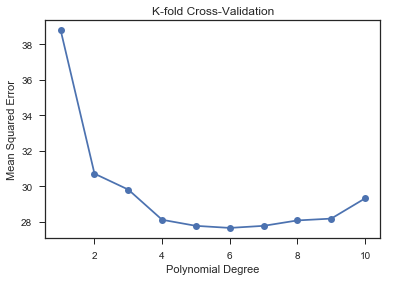

In [18]:
# Create a K-fold (with K = 10) cross-validation generator
kf = KFold(n_splits=10, shuffle=True)


# Make a ordinary linear regression object
regr = skl_lm.LinearRegression()

# Make a list for storing cross validation scores (mean squared errors)
scores = list()

# Make a list of polynomial orders (from 1 to 10)
p_order = np.arange(1,11)

# Iterate through the different polynomial orders
for i in p_order:
    # Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to i
    poly = PolynomialFeatures(i)
    
    # Convert the data into a feature matrix [[1, x1, x1^2, ...],
    #                                         [1, x2, x2^2, ...],
    #                                                       ...]
    X_poly = poly.fit_transform(Boston.lstat.values.reshape(-1,1))
    
    # Calculate the mean squared error via cross validation (using the LeaveOneOut() object)
    score = cross_val_score(regr, X_poly, y=Boston.medv, cv=kf, scoring='neg_mean_squared_error').mean()
    scores.append(-score)

# Plot the MSE vs. polynomial degree
plt.plot(p_order,scores,'-o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.savefig('K_fold.png', dpi=200)
plt.title('K-fold Cross-Validation')

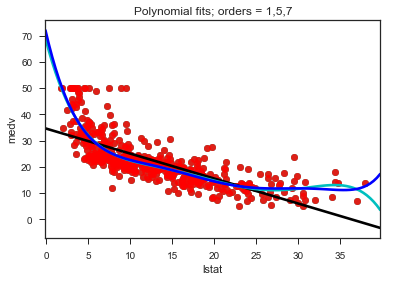

In [19]:
sns.regplot(Boston.lstat, Boston.medv, line_kws={'color':'k'}, ci=None)
sns.regplot(Boston.lstat, Boston.medv, order=5,line_kws={'color':'c'}, ci=None)
sns.regplot(Boston.lstat, Boston.medv, order=7, scatter_kws={'color':'r'},line_kws={'color':'b'}, ci=None)
plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('Polynomial fits; orders = 1,5,7')
sns.set_style('ticks')
plt.savefig('polyfits_boston.png', dpi=200)

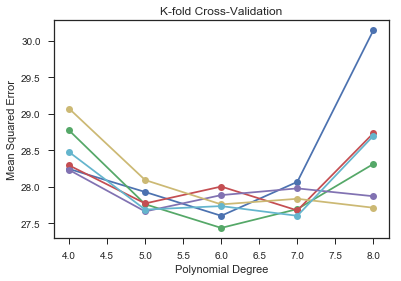

In [74]:
# Make a list of K-Order from orders 5 to 10
k_order = np.arange(5,11)

for i in k_order:
    # Create  K-fold cross-validation generator    
    kf = KFold(n_splits=i, shuffle=True)

    # Make a ordinary linear regression object
    regr = skl_lm.LinearRegression()

    # Make a list for storing cross validation scores (mean squared errors)
    scores = list()

    # Make a list of polynomial orders (from 1 to 10)
    p_order = np.arange(4,9)

    # Iterate through the different polynomial orders
    for i in p_order:
        # Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to i
        poly = PolynomialFeatures(i)

        # Convert the data into a feature matrix [[1, x1, x1^2, ...],
        #                                         [1, x2, x2^2, ...],
        #                                                       ...]
        X_poly = poly.fit_transform(Boston.lstat.values.reshape(-1,1))

        # Calculate the mean squared error via cross validation (using the LeaveOneOut() object)
        score = cross_val_score(regr, X_poly, y=Boston.medv, cv=kf, scoring='neg_mean_squared_error').mean()
        scores.append(-score)

    # Plot the MSE vs. polynomial degree
    plt.plot(p_order,scores,'-o')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Mean Squared Error')
    plt.savefig('K_fold_iteration.png', dpi=200)
    plt.title('K-fold Cross-Validation')